# Tema 4.1 <a class="tocSkip">

# Imports

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

import sklearn.tree
import sklearn.neighbors
import sklearn.naive_bayes
import sklearn.svm
import sklearn.metrics
import sklearn.preprocessing
import sklearn.model_selection

# Data
https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/109/
- Numeric
    - slope\_of\_peak\_exercise\_st\_segment (int, semi-categorical, 1-3)
    - resting\_blood\_pressure (int)
    - chest\_pain\_type (int, semi-categorical, 1-4)
    - num\_major\_vessels (int, semi-categorical, 0-3)
    - resting\_ekg\_results (int, semi-categorical, 0-2)
    - serum\_cholesterol\_mg\_per\_dl (int)
    - oldpeak\_eq\_st\_depression (float)
    - age (int)
    - max\_heart\_rate\_achieved (int)
- Categorical
    - thal
        - normal
        - fixed\_defect
        - reversible\_defect
    - fasting\_blood\_sugar\_gt\_120\_mg\_per\_dl (blood sugar > 120)
        - 0
        - 1
    - sex
        - 0 (f)
        - 1 (m)
    - exercise\_induced\_angina 
        - 0
        - 1


In [2]:
features = pd.read_csv('train_values.csv')
labels = pd.read_csv('train_labels.csv')

In [3]:
features.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [5]:
FEATURES =  ['slope_of_peak_exercise_st_segment', 
             'thal',
             'resting_blood_pressure', 
             'chest_pain_type', 
             'num_major_vessels', 
             'fasting_blood_sugar_gt_120_mg_per_dl',
             'resting_ekg_results', 
             'serum_cholesterol_mg_per_dl', 
             'oldpeak_eq_st_depression', 
             'sex',
             'age', 
             'max_heart_rate_achieved', 
             'exercise_induced_angina']

LABEL = 'heart_disease_present'

EXPLANATIONS = {'slope_of_peak_exercise_st_segment'    : 'Quality of Blood Flow to the Heart',
                'thal'                                 : 'Thallium Stress Test Measuring Blood Flow to the Heart',
                'resting_blood_pressure'               : 'Resting Blood Pressure', 
                'chest_pain_type'                      : 'Chest Pain Type (1-4)',
                'num_major_vessels'                    : 'Major Vessels (0-3) Colored by Flourosopy',
                'fasting_blood_sugar_gt_120_mg_per_dl' : 'Fasting Blood Sugar > 120 mg/dl',
                'resting_ekg_results'                  : 'Resting Electrocardiographic Results (0-2)',
                'serum_cholesterol_mg_per_dl'          : 'Serum Cholesterol in mg/dl',
                'oldpeak_eq_st_depression'             : 'Exercise vs. Rest\nA Measure of Abnormality in Electrocardiograms',
                'age'                                  : 'Age (years)',
                'sex'                                  : 'Sex (m/f)',
                'max_heart_rate_achieved'              : 'Maximum Heart Rate Achieved (bpm)',
                'exercise_induced_angina'              : 'Exercise-Induced Chest Pain (yes/no)'}

NUMERICAL_FEATURES = ['slope_of_peak_exercise_st_segment', 
                      'resting_blood_pressure', 
                      'chest_pain_type', 
                      'num_major_vessels', 
                      'resting_ekg_results', 
                      'serum_cholesterol_mg_per_dl', 
                      'oldpeak_eq_st_depression', 
                      'age', 
                      'max_heart_rate_achieved']

CATEGORICAL_FEATURES = ['thal', 
                        'fasting_blood_sugar_gt_120_mg_per_dl', 
                        'sex', 
                        'exercise_induced_angina']

CATEGORICAL_FEATURE_VALUES = {'thal'                                 : [[0, 1, 2], ['Normal', 
                                                                                    'Fixed Defect', 
                                                                                    'Reversible Defect']], 
                              'fasting_blood_sugar_gt_120_mg_per_dl' : [[0, 1], ['No', 'Yes']],
                              'sex'                                  : [[0, 1], ['F', 'M']], 
                              'exercise_induced_angina'              : [[0, 1], ['No', 'Yes']]}

SEMI_CATEGORICAL_FEATURES = ['slope_of_peak_exercise_st_segment',
                             'chest_pain_type',
                             'num_major_vessels',
                             'resting_ekg_results']

SEMI_CATEGORICAL_FEATURE_LIMITS = {'slope_of_peak_exercise_st_segment' : [1, 3],
                                   'chest_pain_type'                   : [1, 4],
                                   'num_major_vessels'                 : [0, 3],
                                   'resting_ekg_results'               : [0, 2]}

LABEL_VALUES = [[0, 1], ['No', 'Yes']]


In [6]:
for feature in CATEGORICAL_FEATURES:
    if len(CATEGORICAL_FEATURE_VALUES[feature][0]) > 2:
        
        onehot_feature = pd.get_dummies(features[feature])
        
        feature_index = features.columns.get_loc(feature)
        features.drop(feature, axis=1, inplace=True)
        
        onehot_feature.columns = [f'{feature}={feature_value}' for feature_value in onehot_feature.columns]
        for colname in onehot_feature.columns[::-1]:
            features.insert(feature_index, colname, onehot_feature[colname])

In [7]:
features.head()

,patient_id,slope_of_peak_exercise_st_segment,thal=fixed_defect,thal=normal,thal=reversible_defect,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,0,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,0,1,0,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,0,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,0,0,1,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,0,0,1,178,1,0,0,2,270,4.2,1,59,145,0


In [8]:
x = features.values[:,1:].astype(int)
y = labels.values[:,-1].astype(int)

print('x =\n', x)
print('y =\n', y)

x =
 [[  1   0   1 ...  45 170   0]
 [  2   0   1 ...  54 158   0]
 [  1   0   1 ...  77 162   1]
 ...
 [  2   0   0 ...  64 131   1]
 [  1   0   1 ...  48 175   0]
 [  1   0   1 ...  54 163   0]]
y =
 [0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1
 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0]


In [9]:
stratified_kflod_validator = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)

stratified_kflod_validator

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

# Decision Trees

In [10]:
tree_mean_acc = 0
tree_score_df = pd.DataFrame(columns = ['Fold', 'Accuracy', 'Precision', 'Recall'])

for fold_ind, (train_indices, test_indices) in enumerate(stratified_kflod_validator.split(x, y), 1):
    
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    dec_tree = sklearn.tree.DecisionTreeClassifier(min_samples_split = 5)
    dec_tree.fit(x_train, y_train)
    
    acc = dec_tree.score(x_test, y_test)
    tree_mean_acc += acc
    
    y_pred = dec_tree.predict(x_test)
    precision = sklearn.metrics.precision_score(y_test, y_pred)
    recall = sklearn.metrics.recall_score(y_test, y_pred)
    
    tree_score_df.loc[fold_ind] = [f'{fold_ind}', 
                                   f'{acc*100:.2f} %', 
                                   f'{precision*100:.2f} %', 
                                   f'{recall*100:.2f} %']
    
    tree_plot_data = sklearn.tree.export_graphviz(dec_tree, out_file = None,
                                                  feature_names = features.columns[1:], 
                                                  class_names = [f'{labels.columns[1]}={label_value}' 
                                                                 for label_value 
                                                                 in LABEL_VALUES[1]],
                                                  filled = True, 
                                                  rounded = True, 
                                                  special_characters = True) 
    graph = graphviz.Source(tree_plot_data) 
    graph.render(f'Fold {fold_ind}')
    
next_ind = len(tree_score_df) + 1

mean_acc  = tree_score_df['Accuracy'].apply(lambda n: float(n[:-2])).mean()
mean_prec = tree_score_df['Precision'].apply(lambda n: float(n[:-2])).mean()
mean_rec  = tree_score_df['Recall'].apply(lambda n: float(n[:-2])).mean()

tree_score_df.loc[next_ind] = ['Avg', f'{mean_acc:.2f} %', f'{mean_prec:.2f} %', f'{mean_rec:.2f} %']
tree_score_df

,Fold,Accuracy,Precision,Recall
1,1,66.67 %,61.11 %,68.75 %
2,2,77.78 %,72.22 %,81.25 %
3,3,55.56 %,50.00 %,62.50 %
4,4,77.78 %,72.22 %,81.25 %
5,5,91.67 %,93.33 %,87.50 %
6,Avg,73.89 %,69.78 %,76.25 %


# KNN

In [11]:
# TODO Normalize

knn_mean_score_df = pd.DataFrame(columns = ['k', 'Avg. Accuracy', 'Avg. Precision', 'Avg. Recall'])

normalized_x = sklearn.preprocessing.normalize(x) # No improvement over un-normalized data.

mean_accs = []
for k in list(range(1, 10)) + [math.ceil(len(features) * step) for step in [0.1, 0.2, 0.3, 0.4, 0.5]]:
    
    knn_score_df = pd.DataFrame(columns = ['Fold', 'Accuracy', 'Precision', 'Recall'])

    mean_acc = 0
    for fold_ind, (train_indices, test_indices) in enumerate(stratified_kflod_validator.split(x, y), 1):

        x_train, x_test = normalized_x[train_indices], normalized_x[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train, y_train)

        acc = knn.score(x_test, y_test)
        mean_acc += acc
        
        y_pred = knn.predict(x_test)
        precision = sklearn.metrics.precision_score(y_test, y_pred)
        recall = sklearn.metrics.recall_score(y_test, y_pred)

        knn_score_df.loc[fold_ind] = [f'{fold_ind}', 
                                      f'{acc*100:.2f} %',
                                      f'{precision*100:.2f} %', 
                                      f'{recall*100:.2f} %']

    next_ind = len(knn_score_df) + 1
    
    mean_acc  = knn_score_df['Accuracy'].apply(lambda n: float(n[:-2])).mean()
    mean_prec = knn_score_df['Precision'].apply(lambda n: float(n[:-2])).mean()
    mean_rec  = knn_score_df['Recall'].apply(lambda n: float(n[:-2])).mean()
    
    knn_score_df.loc[next_ind] = ['Avg', 
                                  f'{acc*100:.2f} %',
                                  f'{precision*100:.2f} %', 
                                  f'{recall*100:.2f} %']
    
    knn_mean_score_df.loc[k] = [k, 
                                f'{mean_acc:.2f} %', 
                                f'{mean_prec:.2f} %', 
                                f'{mean_rec:.2f} %']

#     print(f'k = {k}')
#     print(knn_score_df)
#     print()
    
best_accuracy = knn_mean_score_df.sort_values(by = ['Avg. Accuracy']).iloc[-1]
print('Best avg. accuracy is', best_accuracy['Avg. Accuracy'], 'for k =', best_accuracy['k'], '.')
knn_mean_score_df.sort_values(by = ['Avg. Accuracy'])

Best avg. accuracy is 62.78 % for k = 90 .


,k,Avg. Accuracy,Avg. Precision,Avg. Recall
4,4,53.89 %,44.75 %,28.75 %
5,5,55.00 %,49.40 %,47.50 %
7,7,55.56 %,50.45 %,45.00 %
1,1,56.67 %,50.45 %,55.00 %
6,6,56.67 %,50.72 %,32.50 %
9,9,56.67 %,51.97 %,47.50 %
3,3,57.78 %,52.35 %,47.50 %
2,2,58.89 %,56.95 %,30.00 %
8,8,58.89 %,56.52 %,37.50 %
18,18,58.89 %,58.50 %,41.25 %


# Naive Bayes

In [12]:
nb_classifier_types = [sklearn.naive_bayes.GaussianNB,
                       sklearn.naive_bayes.MultinomialNB,
                       sklearn.naive_bayes.ComplementNB,
                       sklearn.naive_bayes.BernoulliNB]

nb_mean_score_df = pd.DataFrame(columns = ['Type', 'Avg. Accuracy', 'Avg. Precision', 'Avg. Recall'])

for nb_classifier_type in nb_classifier_types:
    
    nb_score_df = pd.DataFrame(columns = ['Fold', 'Accuracy', 'Precision', 'Recall'])

    mean_acc = 0
    for fold_ind, (train_indices, test_indices) in enumerate(stratified_kflod_validator.split(x, y), 1):

        x_train, x_test = x[train_indices], x[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        nb = nb_classifier_type()
        nb.fit(x_train, y_train)

        acc = nb.score(x_test, y_test)
        mean_acc += acc
        
        y_pred = nb.predict(x_test)
        precision = sklearn.metrics.precision_score(y_test, y_pred)
        recall = sklearn.metrics.recall_score(y_test, y_pred)

        nb_score_df.loc[fold_ind] = [f'{fold_ind}', 
                                     f'{acc*100:.2f} %', 
                                     f'{precision*100:.2f} %', 
                                     f'{recall*100:.2f} %']

    next_ind = len(nb_score_df) + 1
    
    mean_acc  = nb_score_df['Accuracy'].apply(lambda n: float(n[:-2])).mean()
    mean_prec = nb_score_df['Precision'].apply(lambda n: float(n[:-2])).mean()
    mean_rec  = nb_score_df['Recall'].apply(lambda n: float(n[:-2])).mean()
    
    nb_score_df.loc[next_ind] = ['Avg', 
                                 f'{mean_acc:.2f} %', 
                                 f'{mean_prec:.2f} %', 
                                 f'{mean_rec:.2f} %']
    
    nb_mean_score_df.loc[len(nb_mean_score_df) + 1] = [nb_classifier_type.__name__, 
                                                       f'{mean_acc:.2f} %', 
                                                       f'{mean_prec:.2f} %', 
                                                       f'{mean_rec:.2f} %']

    print(nb_classifier_type.__name__)
    print()
    print(nb_score_df)
    print()
    
nb_mean_score_df.sort_values(by = ['Avg. Accuracy'])

GaussianNB

  Fold Accuracy Precision   Recall
1    1  86.11 %   82.35 %  87.50 %
2    2  77.78 %   72.22 %  81.25 %
3    3  88.89 %   87.50 %  87.50 %
4    4  77.78 %   72.22 %  81.25 %
5    5  83.33 %   81.25 %  81.25 %
6  Avg  82.78 %   79.11 %  83.75 %

MultinomialNB

  Fold Accuracy Precision   Recall
1    1  83.33 %   91.67 %  68.75 %
2    2  80.56 %   73.68 %  87.50 %
3    3  77.78 %   78.57 %  68.75 %
4    4  72.22 %   68.75 %  68.75 %
5    5  75.00 %   68.42 %  81.25 %
6  Avg  77.78 %   76.22 %  75.00 %

ComplementNB

  Fold Accuracy Precision   Recall
1    1  91.67 %   88.24 %  93.75 %
2    2  75.00 %   68.42 %  81.25 %
3    3  69.44 %   69.23 %  56.25 %
4    4  77.78 %   70.00 %  87.50 %
5    5  80.56 %   76.47 %  81.25 %
6  Avg  78.89 %   74.47 %  80.00 %

BernoulliNB

  Fold Accuracy Precision   Recall
1    1  69.44 %   69.23 %  56.25 %
2    2  86.11 %   86.67 %  81.25 %
3    3  80.56 %   80.00 %  75.00 %
4    4  80.56 %   71.43 %  93.75 %
5    5  77.78 %   72.22 %  81.25 

,Type,Avg. Accuracy,Avg. Precision,Avg. Recall
2,MultinomialNB,77.78 %,76.22 %,75.00 %
3,ComplementNB,78.89 %,74.47 %,80.00 %
4,BernoulliNB,78.89 %,75.91 %,77.50 %
1,GaussianNB,82.78 %,79.11 %,83.75 %


# SVM

In [158]:
svm_classifier_type = sklearn.svm.SVC

#                                                      Avg.
# Args                                  ->  acc    /   prec  /  rec
#
# kernel: linear                        -> 78.89 %   78.31 %   73.75 %
# kernel: linear, C: 0.1                -> 84.44 %   88.54 %   75.00 %
#
#  * No improvement for larger C.
#
# kernel: poly, max_iter: 1             -> 46.67 %   34.67 %   21.25 %
# kernel: poly, max_iter: 10            -> 57.22 %   51.27 %   66.25 %
# kernel: poly, max_iter: 100           -> 61.67 %   60.18 %   40.00 %
# kernel: poly, max_iter: 100, coef0: 1 -> 62.22 %   62.19 %   41.25 %
#
#  * No improvement for more iters.
#  * No improvement for larger C.
#  * No improvement for higher degree.
#  * No improvement for different coef0.
#
# kernel: rbf, max_iter: 10             -> 48.89 %   46.07 %  72.50 %
# kernel: rbf, max_iter: 100            -> 60.00 %   74.00 %  17.50 %
# kernel: rbf, max_iter: 1000           -> 60.56 %   78.33 %  15.00 %


args = {'kernel': 'linear', 'C': 0.1}

svm_score_df = pd.DataFrame(columns = ['Type', 'Accuracy', 'Precision', 'Recall'])

# normalized_x = sklearn.preprocessing.normalize(x)

mean_acc = 0
for fold_ind, (train_indices, test_indices) in enumerate(stratified_kflod_validator.split(x, y), 1):

    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    svm = svm_classifier_type(**args, gamma = 'scale', cache_size = 256)
    svm.fit(x_train, y_train)

    acc = svm.score(x_test, y_test)
    mean_acc += acc

    y_pred = svm.predict(x_test)
    precision = sklearn.metrics.precision_score(y_test, y_pred)
    recall = sklearn.metrics.recall_score(y_test, y_pred)

    svm_score_df.loc[fold_ind] = [f'{fold_ind}', 
                                  f'{acc*100:.2f} %', 
                                  f'{precision*100:.2f} %', 
                                  f'{recall*100:.2f} %']

next_ind = len(svm_score_df) + 1

mean_acc  = svm_score_df['Accuracy'].apply(lambda n: float(n[:-2])).mean()
mean_prec = svm_score_df['Precision'].apply(lambda n: float(n[:-2])).mean()
mean_rec  = svm_score_df['Recall'].apply(lambda n: float(n[:-2])).mean()

svm_score_df.loc[next_ind] = ['Avg', 
                              f'{mean_acc:.2f} %', 
                              f'{mean_prec:.2f} %', 
                              f'{mean_rec:.2f} %']

print(svm_score_df)

  Type Accuracy Precision   Recall
1    1  75.00 %   81.82 %  56.25 %
2    2  91.67 %   88.24 %  93.75 %
3    3  86.11 %   82.35 %  87.50 %
4    4  77.78 %   75.00 %  75.00 %
5    5  80.56 %   80.00 %  75.00 %
6  Avg  82.22 %   81.48 %  77.50 %


# Shallow Neural Nets

## Import deps

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, LeakyReLU

Using TensorFlow backend.


## Import data

In [2]:
features = pd.read_csv('train_values.csv')
labels = pd.read_csv('train_labels.csv')

print(labels.head())
features.head()

  patient_id  heart_disease_present
0     0z64un                      0
1     ryoo3j                      0
2     yt1s1x                      1
3     l2xjde                      1
4     oyt4ek                      0


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [3]:
FEATURES =  ['slope_of_peak_exercise_st_segment', 
             'thal',
             'resting_blood_pressure', 
             'chest_pain_type', 
             'num_major_vessels', 
             'fasting_blood_sugar_gt_120_mg_per_dl',
             'resting_ekg_results', 
             'serum_cholesterol_mg_per_dl', 
             'oldpeak_eq_st_depression', 
             'sex',
             'age', 
             'max_heart_rate_achieved', 
             'exercise_induced_angina']

LABEL = 'heart_disease_present'

EXPLANATIONS = {'slope_of_peak_exercise_st_segment'    : 'Quality of Blood Flow to the Heart',
                'thal'                                 : 'Thallium Stress Test Measuring Blood Flow to the Heart',
                'resting_blood_pressure'               : 'Resting Blood Pressure', 
                'chest_pain_type'                      : 'Chest Pain Type (1-4)',
                'num_major_vessels'                    : 'Major Vessels (0-3) Colored by Flourosopy',
                'fasting_blood_sugar_gt_120_mg_per_dl' : 'Fasting Blood Sugar > 120 mg/dl',
                'resting_ekg_results'                  : 'Resting Electrocardiographic Results (0-2)',
                'serum_cholesterol_mg_per_dl'          : 'Serum Cholesterol in mg/dl',
                'oldpeak_eq_st_depression'             : 'Exercise vs. Rest\nA Measure of Abnormality in Electrocardiograms',
                'age'                                  : 'Age (years)',
                'sex'                                  : 'Sex (m/f)',
                'max_heart_rate_achieved'              : 'Maximum Heart Rate Achieved (bpm)',
                'exercise_induced_angina'              : 'Exercise-Induced Chest Pain (yes/no)'}

NUMERICAL_FEATURES = ['slope_of_peak_exercise_st_segment', 
                      'resting_blood_pressure', 
                      'chest_pain_type', 
                      'num_major_vessels', 
                      'resting_ekg_results', 
                      'serum_cholesterol_mg_per_dl', 
                      'oldpeak_eq_st_depression', 
                      'age', 
                      'max_heart_rate_achieved']

CATEGORICAL_FEATURES = ['thal', 
                        'fasting_blood_sugar_gt_120_mg_per_dl', 
                        'sex', 
                        'exercise_induced_angina']

CATEGORICAL_FEATURE_VALUES = {'thal'                                 : [[0, 1, 2], ['Normal', 
                                                                                    'Fixed Defect', 
                                                                                    'Reversible Defect']], 
                              'fasting_blood_sugar_gt_120_mg_per_dl' : [[0, 1], ['No', 'Yes']],
                              'sex'                                  : [[0, 1], ['F', 'M']], 
                              'exercise_induced_angina'              : [[0, 1], ['No', 'Yes']]}

SEMI_CATEGORICAL_FEATURES = ['slope_of_peak_exercise_st_segment',
                             'chest_pain_type',
                             'num_major_vessels',
                             'resting_ekg_results']

SEMI_CATEGORICAL_FEATURE_LIMITS = {'slope_of_peak_exercise_st_segment' : [1, 3],
                                   'chest_pain_type'                   : [1, 4],
                                   'num_major_vessels'                 : [0, 3],
                                   'resting_ekg_results'               : [0, 2]}

LABEL_VALUES = [[0, 1], ['No', 'Yes']]


In [4]:
for feature in CATEGORICAL_FEATURES:
    if len(CATEGORICAL_FEATURE_VALUES[feature][0]) > 2:
        
        onehot_feature = pd.get_dummies(features[feature])
        
        feature_index = features.columns.get_loc(feature)
        features.drop(feature, axis=1, inplace=True)
        
        onehot_feature.columns = ['%s=%s' % (feature, feature_value) for feature_value in onehot_feature.columns]
        for colname in onehot_feature.columns[::-1]:
            features.insert(feature_index, colname, onehot_feature[colname])

In [5]:
x = features.values[:,1:].astype(int)
y = labels.values[:,-1].astype(int)

print('x =\n', x)
print('y =\n', y)

x =
 [[  1   0   1 ...  45 170   0]
 [  2   0   1 ...  54 158   0]
 [  1   0   1 ...  77 162   1]
 ...
 [  2   0   0 ...  64 131   1]
 [  1   0   1 ...  48 175   0]
 [  1   0   1 ...  54 163   0]]
y =
 [0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1
 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0]


In [6]:
# for fold_ind, (train_indices, test_indices) in enumerate(stratified_kflod_validator.split(x, y), 1):

#     x_train, x_test = x[train_indices], x[test_indices]
#     y_train, y_test = y[train_indices], y[test_indices]

In [7]:
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(144, 15) (36, 15)
(144,) (36,)


## Define model

In [8]:
input_shape = (1,15)
num_classes = 2

print(x.shape)
print(y.shape)

print(x[:1])
print(y[:1])

(180, 15)
(180,)
[[  1   0   1   0 128   2   0   0   2 308   0   1  45 170   0]]
[0]


### Architecture 0 - Inflating Dense 120-225, 0.5 Dropout, Batch Norm, Sigmoid Classification

In [32]:
arch_cnt = 'arch-0-3'

model = Sequential()
model.add(
    Dense(120, input_dim=15, kernel_initializer='normal',
          # kernel_regularizer=keras.regularizers.l2(0.001), # pierd 0.2 acc
          activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(225, input_dim=15, kernel_initializer='normal', activation='relu'))
# model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis = 1))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 120)               1920      
_________________________________________________________________
dropout_7 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 225)               27225     
_________________________________________________________________
batch_normalization_7 (Batch (None, 225)               900       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 226       
Total params: 30,271
Trainable params: 29,821
Non-trainable params: 450
_________________________________________________________________


In [33]:
%%time

# earlystop_cb = keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=5, restore_best_weights=True,
#     verbose=1)
reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.05,
    patience=5, min_lr=0.001,
    verbose=1)

# es_cb = keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     min_delta=0.1,
#     patience=7,
#     verbose=1,
#     mode='auto'
# )
# 'restore_best_weights' in dir(keras.callbacks.EarlyStopping()) # FALSE = library is not up-to-date

tb_cb = keras.callbacks.TensorBoard(log_dir='./tensorboard/%s' % arch_cnt, histogram_freq=0,  
          write_graph=True, write_images=True)


epochs = 50
batch_size = 32

model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    
    shuffle=False,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr_cb, es_cb, tb_cb]
)

Train on 144 samples, validate on 36 samples
Epoch 1/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6969 - acc: 0.5417 - val_loss: 0.6813 - val_acc: 0.5556
Epoch 2/50
144/144 [==============================] - 0s 71us/step - loss: 0.7291 - acc: 0.5417 - val_loss: 0.6876 - val_acc: 0.5556
Epoch 3/50
144/144 [==============================] - 0s 81us/step - loss: 0.7537 - acc: 0.5000 - val_loss: 0.7145 - val_acc: 0.4444
Epoch 4/50
144/144 [==============================] - 0s 138us/step - loss: 0.6780 - acc: 0.5556 - val_loss: 0.7250 - val_acc: 0.4444
Epoch 5/50
144/144 [==============================] - 0s 80us/step - loss: 0.7757 - acc: 0.4444 - val_loss: 0.7068 - val_acc: 0.4444
Epoch 6/50
144/144 [==============================] - 0s 106us/step - loss: 0.6985 - acc: 0.5556 - val_loss: 0.6883 - val_acc: 0.4167

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.
Epoch 7/50
144/144 [==============================] - 0s 84us/step - loss: 0.7108 - acc: 0.

In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6797179447280036
Test accuracy: 0.5555555555555556


### Architecture 1 - **`Deflating Dense 225-112`**, 0.5 Dropout, Batch Norm, Sigmoid Classification

In [14]:
arch_cnt = 'arch-1'

model = Sequential()
model.add(
    Dense(225, input_dim=15, kernel_initializer='normal',
          # kernel_regularizer=keras.regularizers.l2(0.001), # pierd 0.2 acc
          activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(112, input_dim=15, kernel_initializer='normal', activation='relu'))
# model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis = 1))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 225)               3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 225)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 112)               25312     
_________________________________________________________________
batch_normalization_2 (Batch (None, 112)               448       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 113       
Total params: 29,473
Trainable params: 29,249
Non-trainable params: 224
_________________________________________________________________


In [15]:
%%time

# earlystop_cb = keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=5, restore_best_weights=True,
#     verbose=1)
reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.05,
    patience=7, min_lr=0.001,
    verbose=1)

tb_cb = keras.callbacks.TensorBoard(log_dir='./tensorboard/%s' % arch_cnt, histogram_freq=0,  
          write_graph=True, write_images=True)


epochs = 50
batch_size = 32

model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    
    shuffle=False,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr_cb, tb_cb]
    # callbacks=[earlystop_cb, reduce_lr_cb]
)

Train on 144 samples, validate on 36 samples
Epoch 1/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7093 - acc: 0.5069 - val_loss: 0.6825 - val_acc: 0.5833
Epoch 2/50
144/144 [==============================] - 0s 73us/step - loss: 0.6929 - acc: 0.5694 - val_loss: 0.6799 - val_acc: 0.7500
Epoch 3/50
144/144 [==============================] - 0s 80us/step - loss: 0.6967 - acc: 0.5069 - val_loss: 0.6785 - val_acc: 0.6111
Epoch 4/50
144/144 [==============================] - 0s 81us/step - loss: 0.6565 - acc: 0.6042 - val_loss: 0.6805 - val_acc: 0.5278
Epoch 5/50
144/144 [==============================] - 0s 75us/step - loss: 0.7139 - acc: 0.4861 - val_loss: 0.6793 - val_acc: 0.5000
Epoch 6/50
144/144 [==============================] - 0s 71us/step - loss: 0.6951 - acc: 0.5833 - val_loss: 0.6761 - val_acc: 0.5278
Epoch 7/50
144/144 [==============================] - 0s 88us/step - loss: 0.6469 - acc: 0.6181 - val_loss: 0.6785 - val_acc: 0.4722
Epoch 8/50
144/144 [=====

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6483488314681582
Test accuracy: 0.6944444444444444


### Architecture 2 - Deflating Dense 225-112, 0.5 Dropout, Batch Norm, Sigmoid Classification, **`HE Initialization`**

In [17]:
arch_cnt = 'arch-2'

model = Sequential()
model.add(
    Dense(225, input_dim=15, kernel_initializer='he_uniform',
          kernel_regularizer=keras.regularizers.l2(0.001), # pierd 0.2 acc
          activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(112, input_dim=15, kernel_initializer='he_uniform', activation='relu'))
# model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis = 1))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 225)               3600      
_________________________________________________________________
dropout_3 (Dropout)          (None, 225)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 112)               25312     
_________________________________________________________________
batch_normalization_3 (Batch (None, 112)               448       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 113       
Total params: 29,473
Trainable params: 29,249
Non-trainable params: 224
_________________________________________________________________


In [18]:
%%time

# earlystop_cb = keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=5, restore_best_weights=True,
#     verbose=1)
reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.05,
    patience=7, min_lr=0.001,
    verbose=1)

tb_cb = keras.callbacks.TensorBoard(log_dir='./tensorboard/%s' % arch_cnt, histogram_freq=0,  
          write_graph=True, write_images=True)


epochs = 50
batch_size = 32

model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    
    shuffle=False,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr_cb, tb_cb]
    # callbacks=[earlystop_cb, reduce_lr_cb]
)

Train on 144 samples, validate on 36 samples
Epoch 1/50
144/144 [==============================] - 0s 2ms/step - loss: 1.1839 - acc: 0.4792 - val_loss: 1.1616 - val_acc: 0.4167
Epoch 2/50
144/144 [==============================] - 0s 105us/step - loss: 1.1813 - acc: 0.4583 - val_loss: 1.1539 - val_acc: 0.4167
Epoch 3/50
144/144 [==============================] - 0s 79us/step - loss: 1.1809 - acc: 0.3958 - val_loss: 1.1394 - val_acc: 0.4444
Epoch 4/50
144/144 [==============================] - 0s 104us/step - loss: 1.1154 - acc: 0.5347 - val_loss: 1.1291 - val_acc: 0.4444
Epoch 5/50
144/144 [==============================] - 0s 80us/step - loss: 1.1076 - acc: 0.5417 - val_loss: 1.1173 - val_acc: 0.4444
Epoch 6/50
144/144 [==============================] - 0s 112us/step - loss: 1.0832 - acc: 0.5764 - val_loss: 1.1076 - val_acc: 0.4444
Epoch 7/50
144/144 [==============================] - 0s 81us/step - loss: 1.0518 - acc: 0.6458 - val_loss: 1.0964 - val_acc: 0.4444
Epoch 8/50
144/144 [==

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8960549301571317
Test accuracy: 0.4444444444444444


### Architecture 3 - Deflating Dense 225-112, 0.5 Dropout, Batch Norm, Sigmoid Classification, **`L2 = 1e^-4`**

In [44]:
arch_cnt = 'arch-3-4'

model = Sequential()
model.add(
    Dense(225, input_dim=15, kernel_initializer='normal',
          kernel_regularizer=keras.regularizers.l2(0.0001), # pierd 0.2 acc
          activation='relu'))
model.add(Dropout(0.5))
model.add(
    Dense(112, input_dim=15, kernel_initializer='normal',
          kernel_regularizer=keras.regularizers.l2(0.0001), # pierd 0.2 acc
          activation='relu'))
# model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis = 1))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 225)               3600      
_________________________________________________________________
dropout_11 (Dropout)         (None, 225)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 112)               25312     
_________________________________________________________________
batch_normalization_11 (Batc (None, 112)               448       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 113       
Total params: 29,473
Trainable params: 29,249
Non-trainable params: 224
_________________________________________________________________


In [45]:
%%time

# earlystop_cb = keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=5, restore_best_weights=True,
#     verbose=1)
reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.05,
    patience=7, min_lr=0.001,
    verbose=1)

tb_cb = keras.callbacks.TensorBoard(log_dir='./tensorboard/%s' % arch_cnt, histogram_freq=0,  
          write_graph=True, write_images=True)


epochs = 50
batch_size = 32

model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    
    shuffle=False,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr_cb, tb_cb]
    # callbacks=[earlystop_cb, reduce_lr_cb]
)

Train on 144 samples, validate on 36 samples
Epoch 1/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - acc: 0.6528 - val_loss: 0.7009 - val_acc: 0.5000
Epoch 2/50
144/144 [==============================] - 0s 90us/step - loss: 0.7097 - acc: 0.5417 - val_loss: 0.6948 - val_acc: 0.6111
Epoch 3/50
144/144 [==============================] - 0s 105us/step - loss: 0.7187 - acc: 0.5069 - val_loss: 0.6937 - val_acc: 0.6111
Epoch 4/50
144/144 [==============================] - 0s 88us/step - loss: 0.6837 - acc: 0.6042 - val_loss: 0.6939 - val_acc: 0.6111
Epoch 5/50
144/144 [==============================] - 0s 108us/step - loss: 0.6921 - acc: 0.5694 - val_loss: 0.7035 - val_acc: 0.4722
Epoch 6/50
144/144 [==============================] - 0s 115us/step - loss: 0.6707 - acc: 0.5972 - val_loss: 0.7112 - val_acc: 0.4444
Epoch 7/50
144/144 [==============================] - 0s 119us/step - loss: 0.6915 - acc: 0.5764 - val_loss: 0.7157 - val_acc: 0.4444
Epoch 8/50
144/144 [=

In [46]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5939429865943061
Test accuracy: 0.6666666666666666


### Architecture 3 - Deflating Dense 225-112, 0.5 Dropout, Batch Norm, Sigmoid Classification, **`L2 = 1e^-3`**

In [41]:
arch_cnt = 'arch-3-3'

model = Sequential()
model.add(
    Dense(225, input_dim=15, kernel_initializer='normal',
          kernel_regularizer=keras.regularizers.l2(0.001), # pierd 0.2 acc
          activation='relu'))
model.add(Dropout(0.5))
model.add(
    Dense(112, input_dim=15, kernel_initializer='normal',
          kernel_regularizer=keras.regularizers.l2(0.001), # pierd 0.2 acc
          activation='relu'))
# model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis = 1))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 225)               3600      
_________________________________________________________________
dropout_10 (Dropout)         (None, 225)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 112)               25312     
_________________________________________________________________
batch_normalization_10 (Batc (None, 112)               448       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 113       
Total params: 29,473
Trainable params: 29,249
Non-trainable params: 224
_________________________________________________________________


In [42]:
%%time

# earlystop_cb = keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=5, restore_best_weights=True,
#     verbose=1)
reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.05,
    patience=7, min_lr=0.001,
    verbose=1)

tb_cb = keras.callbacks.TensorBoard(log_dir='./tensorboard/%s' % arch_cnt, histogram_freq=0,  
          write_graph=True, write_images=True)


epochs = 50
batch_size = 32

model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    
    shuffle=False,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr_cb, tb_cb]
    # callbacks=[earlystop_cb, reduce_lr_cb]
)

Train on 144 samples, validate on 36 samples
Epoch 1/50
144/144 [==============================] - 0s 3ms/step - loss: 0.7692 - acc: 0.5417 - val_loss: 0.7977 - val_acc: 0.4167
Epoch 2/50
144/144 [==============================] - 0s 105us/step - loss: 0.7819 - acc: 0.4792 - val_loss: 0.7888 - val_acc: 0.4167
Epoch 3/50
144/144 [==============================] - 0s 98us/step - loss: 0.7486 - acc: 0.5972 - val_loss: 0.7901 - val_acc: 0.4167
Epoch 4/50
144/144 [==============================] - 0s 89us/step - loss: 0.8262 - acc: 0.4514 - val_loss: 0.8170 - val_acc: 0.4167
Epoch 5/50
144/144 [==============================] - 0s 89us/step - loss: 0.7510 - acc: 0.5139 - val_loss: 0.8423 - val_acc: 0.4167
Epoch 6/50
144/144 [==============================] - 0s 111us/step - loss: 0.7443 - acc: 0.5278 - val_loss: 0.8328 - val_acc: 0.4167
Epoch 7/50
144/144 [==============================] - 0s 112us/step - loss: 0.7216 - acc: 0.5833 - val_loss: 0.8259 - val_acc: 0.4167
Epoch 8/50
144/144 [==

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8408659166759915
Test accuracy: 0.5


### Architecture 3 - Deflating Dense 225-112, 0.5 Dropout, Batch Norm, Sigmoid Classification, **`L2 = 1e^-2`**

In [38]:
arch_cnt = 'arch-3-2'

model = Sequential()
model.add(
    Dense(225, input_dim=15, kernel_initializer='normal',
          kernel_regularizer=keras.regularizers.l2(0.01), # pierd 0.2 acc
          activation='relu'))
model.add(Dropout(0.5))
model.add(
    Dense(112, input_dim=15, kernel_initializer='normal',
          kernel_regularizer=keras.regularizers.l2(0.01), # pierd 0.2 acc
          activation='relu'))
# model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis = 1))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 225)               3600      
_________________________________________________________________
dropout_9 (Dropout)          (None, 225)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 112)               25312     
_________________________________________________________________
batch_normalization_9 (Batch (None, 112)               448       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 113       
Total params: 29,473
Trainable params: 29,249
Non-trainable params: 224
_________________________________________________________________


In [39]:
%%time

# earlystop_cb = keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=5, restore_best_weights=True,
#     verbose=1)
reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.05,
    patience=7, min_lr=0.001,
    verbose=1)

tb_cb = keras.callbacks.TensorBoard(log_dir='./tensorboard/%s' % arch_cnt, histogram_freq=0,  
          write_graph=True, write_images=True)


epochs = 50
batch_size = 32

model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    
    shuffle=False,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr_cb, tb_cb]
    # callbacks=[earlystop_cb, reduce_lr_cb]
)

Train on 144 samples, validate on 36 samples
Epoch 1/50
144/144 [==============================] - 0s 2ms/step - loss: 1.3970 - acc: 0.6111 - val_loss: 1.3253 - val_acc: 0.5833
Epoch 2/50
144/144 [==============================] - 0s 78us/step - loss: 1.3548 - acc: 0.5069 - val_loss: 1.2600 - val_acc: 0.6389
Epoch 3/50
144/144 [==============================] - 0s 134us/step - loss: 1.2752 - acc: 0.5417 - val_loss: 1.2089 - val_acc: 0.5278
Epoch 4/50
144/144 [==============================] - 0s 95us/step - loss: 1.1935 - acc: 0.5833 - val_loss: 1.1714 - val_acc: 0.5000
Epoch 5/50
144/144 [==============================] - 0s 103us/step - loss: 1.1574 - acc: 0.5347 - val_loss: 1.1544 - val_acc: 0.4444
Epoch 6/50
144/144 [==============================] - 0s 85us/step - loss: 1.1429 - acc: 0.5000 - val_loss: 1.1270 - val_acc: 0.4722
Epoch 7/50
144/144 [==============================] - 0s 93us/step - loss: 1.0410 - acc: 0.6458 - val_loss: 1.0989 - val_acc: 0.4444
Epoch 8/50
144/144 [===

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7693172958162096
Test accuracy: 0.5833333333333334


### Architecture 3 - Deflating Dense 225-112, 0.5 Dropout, Batch Norm, Sigmoid Classification, **`L2 = 1e^-1`**

In [35]:
arch_cnt = 'arch-3-1'

model = Sequential()
model.add(
    Dense(225, input_dim=15, kernel_initializer='normal',
          kernel_regularizer=keras.regularizers.l2(0.1), # pierd 0.2 acc
          activation='relu'))
model.add(Dropout(0.5))
model.add(
    Dense(112, input_dim=15, kernel_initializer='normal',
          kernel_regularizer=keras.regularizers.l2(0.1), # pierd 0.2 acc
          activation='relu'))
# model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis = 1))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 225)               3600      
_________________________________________________________________
dropout_8 (Dropout)          (None, 225)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 112)               25312     
_________________________________________________________________
batch_normalization_8 (Batch (None, 112)               448       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 113       
Total params: 29,473
Trainable params: 29,249
Non-trainable params: 224
_________________________________________________________________


In [36]:
%%time

# earlystop_cb = keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=5, restore_best_weights=True,
#     verbose=1)
reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.05,
    patience=7, min_lr=0.001,
    verbose=1)

tb_cb = keras.callbacks.TensorBoard(log_dir='./tensorboard/%s' % arch_cnt, histogram_freq=0,  
          write_graph=True, write_images=True)


epochs = 50
batch_size = 32

model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    
    shuffle=False,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr_cb, tb_cb]
    # callbacks=[earlystop_cb, reduce_lr_cb]
)

Train on 144 samples, validate on 36 samples
Epoch 1/50
144/144 [==============================] - 0s 2ms/step - loss: 7.4829 - acc: 0.5486 - val_loss: 6.8780 - val_acc: 0.4444
Epoch 2/50
144/144 [==============================] - 0s 94us/step - loss: 6.5561 - acc: 0.5764 - val_loss: 6.0230 - val_acc: 0.4444
Epoch 3/50
144/144 [==============================] - 0s 90us/step - loss: 5.7389 - acc: 0.5208 - val_loss: 5.2785 - val_acc: 0.4444
Epoch 4/50
144/144 [==============================] - 0s 109us/step - loss: 5.0140 - acc: 0.5903 - val_loss: 4.6354 - val_acc: 0.4722
Epoch 5/50
144/144 [==============================] - 0s 107us/step - loss: 4.4265 - acc: 0.5556 - val_loss: 4.0890 - val_acc: 0.4444
Epoch 6/50
144/144 [==============================] - 0s 104us/step - loss: 3.9032 - acc: 0.5833 - val_loss: 3.6264 - val_acc: 0.4444
Epoch 7/50
144/144 [==============================] - 0s 98us/step - loss: 3.4811 - acc: 0.5208 - val_loss: 3.2298 - val_acc: 0.4444
Epoch 8/50
144/144 [==

In [37]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8165454334682889
Test accuracy: 0.4722222222222222


---

# Ensemble Methods

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

## Bagging Strategies

### Random Forests

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# x_train, x_test, y_train, y_test

In [20]:

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [21]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
print(clf.feature_importances_)

[0.04117183 0.00496237 0.2124435  0.11033686 0.03552996 0.12413992
 0.09559455 0.         0.00413384 0.03759457 0.05501764 0.02024867
 0.03323923 0.07819483 0.14739222]


In [26]:
print(clf.predict(x_test))

[0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0]


In [27]:
# make predictions for test data
y_pred = clf.predict(x_test)
predictions = [round(value) for value in y_pred]

In [28]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.33%


### ExtraTrees

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
# x_train, x_test, y_train, y_test

In [32]:

clf = ExtraTreesClassifier(n_estimators=100, max_depth=2, random_state=0)

In [33]:
clf.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=2, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [34]:
print(clf.feature_importances_)

[0.03595362 0.00066439 0.19711    0.21279172 0.00303455 0.06847946
 0.10905054 0.00071238 0.00961193 0.00356046 0.03753535 0.04054296
 0.01259753 0.06053845 0.20781666]


In [35]:
print(clf.predict(x_test))

[0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0]


In [36]:
# make predictions for test data
y_pred = clf.predict(x_test)
predictions = [round(value) for value in y_pred]

In [37]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.56%


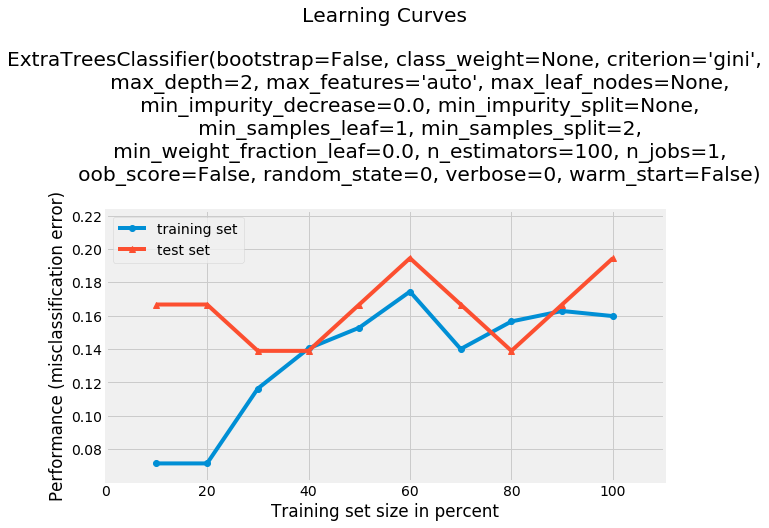

In [51]:
fig = plt.figure(figsize=(10,5))

plot_learning_curves(x_train, y_train, x_test, y_test, clf)

plt.show()

## Stacking Strategies

### SuperLearner

## Boosting Strategies

### xgboost

In [15]:
# import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [9]:
# x_train, x_test, y_train, y_test

In [10]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [11]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [13]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.11%


---

# Bibliography

+ https://medium.com/@datalesdatales/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

+ https://slideplayer.com/slide/4684120/15/images/6/Outline+Bias%2FVariance+Tradeoff+Ensemble+methods+that+minimize+variance.jpg
  + https://slideplayer.com/slide/4684120/

+ plot confusion matrix
+ http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/
+ https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
+ 


+ http://docs.h2o.ai/h2o-tutorials/latest-stable/tutorials/ensembles-stacking/index.html


---